In [1]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#file_id = '1J05tsCBwdhEwkXygcbpKNztsXA6qErPC'
#downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [2]:
!pip install twitterscraper
!pip install vaderSentiment
!pip install langdetect

     |████████████████████████████████| 92kB 3.9MB/s 
  Created wheel for twitterscraper: filename=twitterscraper-1.6.1-cp36-none-any.whl size=11349 sha256=ab52d2ddfc6a7b63d9e8a9bdbb6ac2d8296f461c91d768d967b3d1b9b7602f5a
  Stored in directory: /root/.cache/pip/wheels/1a/50/a0/808fd6df0ac14c168b73874056a1ca52e4d88c0c1ecedd4e48
Successfully built twitterscraper
     |████████████████████████████████| 133kB 2.8MB/s 
     |████████████████████████████████| 983kB 2.8MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=79a3bc6bdad5ab3c7797df5a5ebf772ea0e4c79627ba8b1d9b720cce529716c8
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [3]:
#Importing the relevent libraries
import pandas as pd 
import datetime as dt 
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
begin_date = dt.date(2018,1,1)
end_date = dt.date(2020,3,26)
limit = 100000
lang = 'english'


In [5]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data/
#!cat '/gdrive/My Drive/Morgan Stanley Project/Data and Notebook/pretty_ms_tweets.json'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive/
/gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data


In [ ]:
#tweets = query_tweets("morganstanley", begindate = begin_date, enddate = end_date, limit = limit, lang = lang)


In [ ]:
#Transforming it into a dataframe
#df = pd.DataFrame(t.__dict__ for t in tweets)
#Saving a file
#df.to_csv('TwitterData.csv')

In [6]:
df = pd.read_json('pretty_gs_tweets_feedback.json')
#df_sample = pd.read_csv('TwitterData.csv')



In [7]:
#Sentiment Analysis
#Vader Sentiment

In [8]:
analyzer = SentimentIntensityAnalyzer()

In [9]:
sentiment = df['text'].apply(lambda x: analyzer.polarity_scores(x))

In [10]:
#Inserting the sentiment into the dataframe
df = pd.concat([df, sentiment.apply(pd.Series)],1)

In [11]:
#df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [12]:
df['date'] = df['timestamp'].apply(lambda x: x.date())

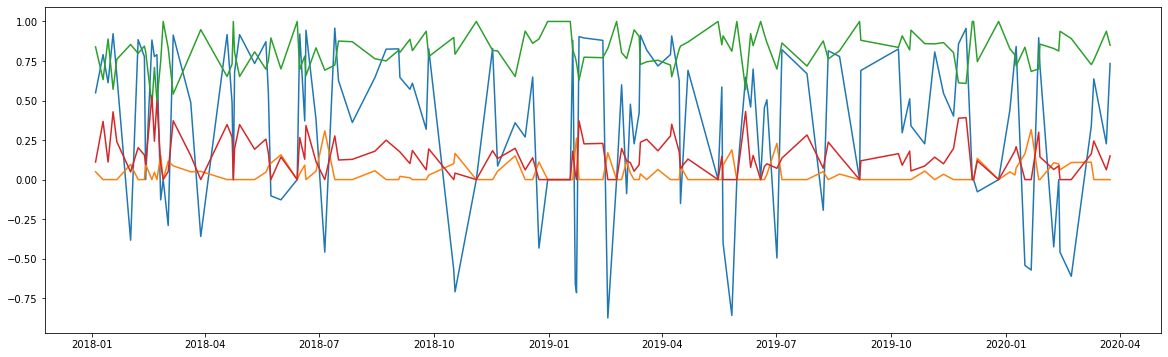

In [13]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(df.groupby('date').mean()['compound'].index, df.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(df.groupby('date').mean()['neg'].index, df.groupby('date').mean()['neg'].values)
plt.plot(df.groupby('date').mean()['neu'].index, df.groupby('date').mean()['neu'].values)
plt.plot(df.groupby('date').mean()['pos'].index, df.groupby('date').mean()['pos'].values)

In [14]:
df['text'].iloc[0]
#As we can see, several of the tweets captures donot refer to morgan stanley. Hence we need to filter out these tweets

"Choosing a logo for our coming YouTube channel & website about finding joy with the daily 'holidays'. We have our favorites, but I'm interested in feedback. What do you think?\nhttps://www.freelancer.com/contest/poll-MTM5OTI4MDox\xa0… https://www.freelancer.com/contest/poll-MTM5OTI4MDox\xa0…"

In [15]:
Filter = df['text'].apply(lambda x: 'jp' in x.lower())
df_filter = df[Filter]
df_filter.shape
df_filter['text'].iloc[0]

'Een aantal grote banken zijn sinds kort ook over op een vorm van continue feedback voor hun medewerkers. JPMorgan, Goldman Sachs en Morgan Stanley zien ook het nut van vernieuwing in HR https://buff.ly/2GN29Jj\xa0pic.twitter.com/f9N5C8wfpU'

Text(0, 0.5, 'Sentiment')

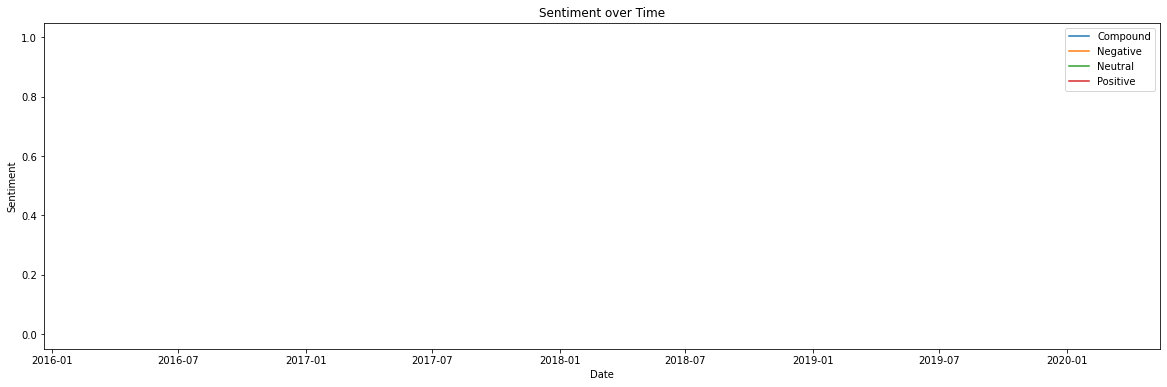

In [16]:
plt.figure(figsize = (20,6))
plt.plot(df_filter.groupby('date').mean()['compound'].index, df_filter.groupby('date').mean()['compound'].values, label = 'Compound')
plt.plot(df_filter.groupby('date').mean()['neg'].index, df_filter.groupby('date').mean()['neg'].values, label = 'Negative')
plt.plot(df_filter.groupby('date').mean()['neu'].index, df_filter.groupby('date').mean()['neu'].values, label = 'Neutral')
plt.plot(df_filter.groupby('date').mean()['pos'].index, df_filter.groupby('date').mean()['pos'].values, label = 'Positive')

plt.legend(loc = 'best')
plt.title('Sentiment over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')

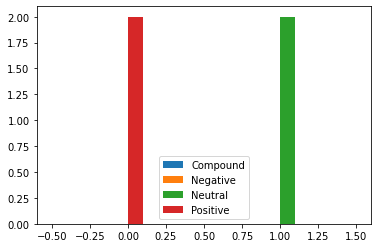

In [17]:

plt.hist(df_filter['compound'].values, label = 'Compound')
plt.hist(df_filter['neg'].values, label = 'Negative')
plt.hist(df_filter['neu'].values, label = 'Neutral')
plt.hist(df_filter['pos'].values, label = 'Positive')

plt.legend(loc = 'best')

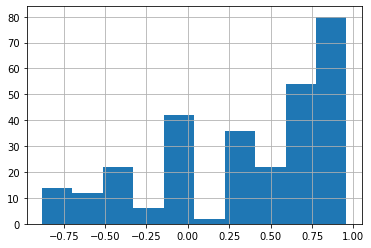

In [18]:
df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [19]:
df.iloc[:,-4:-1]

,neu,pos,compound
0,0.757,0.243,0.8248
1,0.744,0.256,0.8248
2,0.822,0.178,0.7430
3,0.707,0.181,0.5464
4,0.872,0.128,0.3612
...,...,...,...
285,0.909,0.000,-0.4019
286,0.778,0.222,0.8070
287,0.943,0.057,0.2500
288,0.837,0.163,0.7003


In [33]:
#Importing Various twitter data
# all JP files

#Feedback
df = pd.read_json('pretty_gs_tweets_feedback.json')


In [34]:
#LDAVIS
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [35]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [36]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)

dtm_tf = tf_vectorizer.fit_transform(df['text'].values)
print(dtm_tf.shape)

(290, 47)


In [37]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

In [38]:
#dtm_tfidf = tfidf_vectorizer.fit_transform(df['text'].values)
#lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
#lda_tfidf.fit(dtm_tfidf)
#pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

In [39]:
sentiment_wm = df['text'].apply(lambda x: analyzer.polarity_scores(x))
df = pd.concat([df, sentiment_wm.apply(pd.Series)],1)

In [40]:
df.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,neg,neu,pos,compound
0,False,[],[],False,False,0,[https://www.freelancer.com/contest/poll-MTM5O...,,0,[],0,Jacob_D_Goldman,Choosing a logo for our coming YouTube channel...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-24 20:48:44,2018-08-24 20:48:44,1033093772958216192,/Jacob_D_Goldman/status/1033093772958216193,222580216,Jacob D. Goldman,,0.000,0.757,0.243,0.8248
1,False,[],[],True,False,0,[https://www.freelancer.com/contest/poll-MTM5O...,,1,[],0,Jacob_D_Goldman,Choosing a logo for our coming YouTube channel...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-24 20:47:32,2018-08-24 20:47:32,1033093472369033216,/Jacob_D_Goldman/status/1033093472369033216,222580216,Jacob D. Goldman,,0.000,0.744,0.256,0.8248
2,True,[],[https://pbs.twimg.com/media/DkrQdAIUUAEnhoc.j...,True,True,10,[],1029856578592235522,3,"[{'screen_name': 'HARD_HODL', 'user_id': '1010...",2,haydentiff,A Twitter survey suddenly appeared before my e...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-15 22:57:25,2018-08-15 22:57:25,1029864667160760320,/haydentiff/status/1029864667160760320,2680350607,Tiffany Hayden🧢,,0.000,0.822,0.178,0.7430
3,False,[],[],True,True,2,[],1029272758214057984,1,"[{'screen_name': 'AkamatsuJjh', 'user_id': '46...",0,DannyManus,But people DO know things! That Goldman quote ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-15 00:59:05,2018-08-15 00:59:05,1029532900666953728,/DannyManus/status/1029532900666953728,48051407,Danny Manus,,0.112,0.707,0.181,0.5464
4,False,[],[],False,False,1,[],,0,[],0,simonsmithy,Feedback from recruiter... Candidate said my i...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-07-28 08:23:16,2018-07-28 08:23:16,1023121700236537856,/simonsmithy/status/1023121700236537856,66178610,Simon Smith,,0.000,0.872,0.128,0.3612


In [41]:
df_pos = df[df['compound'] >= 0.05]
df_neg = df[df['compound'] <= -0.05]
df_neu = df[( df['compound'] < 0.05 ) & ( df['compound'] > -0.05 )]


In [42]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_pos['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.145400  0.095327       1        1  16.712110
3      0.187569  0.039050       2        1  12.886536
9      0.205902  0.162419       3        1  12.631617
5      0.149793 -0.090399       4        1  10.195749
6      0.048791 -0.178114       5        1   9.729398
1     -0.272185  0.103913       6        1   8.526733
8     -0.293186  0.135851       7        1   8.352500
7     -0.060084 -0.267748       8        1   7.911976
4      0.057671  0.086121       9        1   6.575962
2     -0.169670 -0.086421      10        1   6.477418, topic_info=       Term       Freq      Total Category  logprob  loglift
22    thank  18.000000  18.000000  Default  30.0000  30.0000
12     like  12.000000  12.000000  Default  29.0000  29.0000
19    sachs  24.000000  24.000000  Default  28.0000  28.0000
23   thanks  14.000000  14.000000  Default  27.0000  27.0000
11     just  11.000000  11.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
10    https   0.109610  14.976304  Topic10  -5.1972  -2.1804
26  twitter   0.109616  15.417709  Topic10  -5.1971  -2.2094
22    thank   0.109610  18.523109  Topic10  -5.1972  -2.3930
3       com   0.109613  20.095576  Topic10  -5.1971  -2.4744
19    sachs   0.109610  24.022270  Topic10  -5.1972  -2.6530

[330 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         1  0.630046         app
0         3  0.252018         app
1         2  0.109620  appreciate
1         5  0.109620  appreciate
1         6  0.657719  appreciate
...     ...       ...         ...
28        5  0.591291         way
28        8  0.354774         way
29        1  0.485480         www
29        2  0.364110         www
29        3  0.121370         www

[85 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 10, 6, 7, 2, 9, 8, 5, 3])

In [43]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_neg['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


TypeError: ignored

PreparedData(topic_coordinates=                        x                   y  topics  cluster       Freq
topic                                                                    
2     -0.172619+0.000000j -0.202704+0.000000j       1        1  23.783561
8     -0.168223+0.000000j -0.064811+0.000000j       2        1  17.672218
1     -0.104964+0.000000j  0.385656+0.000000j       3        1  13.601482
9      0.374433+0.000000j  0.002131+0.000000j       4        1  11.877898
6      0.179062+0.000000j -0.112242+0.000000j       5        1   9.440044
3      0.204154+0.000000j -0.005677+0.000000j       6        1   6.722801
7     -0.197665+0.000000j -0.093711+0.000000j       7        1   5.904216
5     -0.038059+0.000000j  0.030452+0.000000j       8        1   3.665927
4     -0.038059+0.000000j  0.030452+0.000000j       9        1   3.665927
0     -0.038059+0.000000j  0.030452+0.000000j      10        1   3.665927, topic_info=              Term       Freq      Total Category  logprob  loglift
3

In [44]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_neu['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


TypeError: ignored

PreparedData(topic_coordinates=                        x                   y  topics  cluster       Freq
topic                                                                    
6     -0.311223+0.000000j  0.031435+0.000000j       1        1  27.013182
3      0.288583+0.000000j  0.031654+0.000000j       2        1  20.246222
4      0.037835+0.000000j -0.221692+0.000000j       3        1  15.569837
0      0.052582+0.000000j  0.169506+0.000000j       4        1  12.566803
9     -0.011296+0.000000j -0.001817+0.000000j       5        1   4.100659
8     -0.011296+0.000000j -0.001817+0.000000j       6        1   4.100659
7     -0.011296+0.000000j -0.001817+0.000000j       7        1   4.100659
5     -0.011296+0.000000j -0.001817+0.000000j       8        1   4.100659
2     -0.011296+0.000000j -0.001817+0.000000j       9        1   4.100659
1     -0.011296+0.000000j -0.001817+0.000000j      10        1   4.100659, topic_info=      Term      Freq     Total Category  logprob  loglift
3  twitter 

In [45]:
print(df_pos.shape)
print(df_neg.shape)
print(df_neu.shape)

(194, 25)
(62, 25)
(34, 25)
